In [1]:

import sounddevice as sd


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [3]:
record_sr = 44100
process_sr = 11025
duration = 5

In [4]:
print("Recording...")
audio = sd.rec(int(duration * record_sr), samplerate=record_sr, channels=1)
sd.wait()
print("Recording finished")

audio = audio.flatten()

Recording...
Recording finished


In [5]:
# Downsample
audio_resampled = librosa.resample(audio, orig_sr=record_sr, target_sr=process_sr)

In [6]:
# Spectrogram
S = librosa.stft(audio_resampled, n_fft=2048, hop_length=512)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

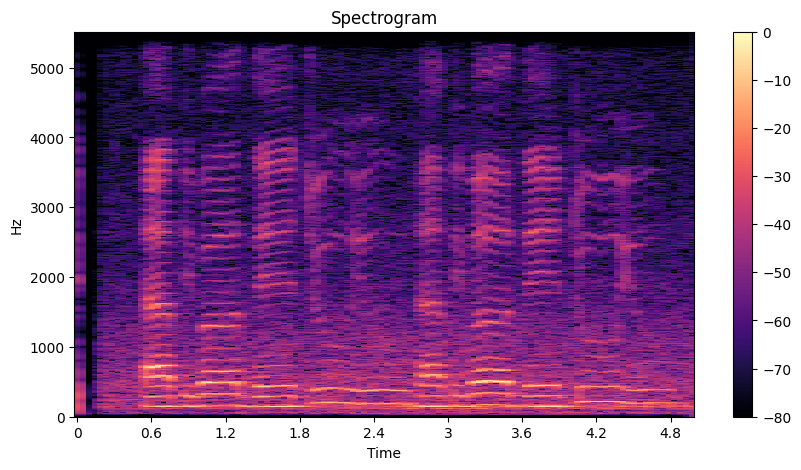

In [7]:
# Plot
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=process_sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram")
plt.show()

In [8]:
print("\n===== AUDIO INFORMATION =====")

print(f"Recording Sample Rate       : {record_sr} Hz")
print(f"Processing Sample Rate      : {process_sr} Hz")

print(f"Recording Duration          : {duration} seconds")

print(f"Original Audio Shape        : {audio.shape}")
print(f"Resampled Audio Shape       : {audio_resampled.shape}")

print(f"Original Total Samples      : {len(audio)}")
print(f"Processed Total Samples     : {len(audio_resampled)}")

print(f"Original Audio Length       : {len(audio)/record_sr:.2f} sec")
print(f"Processed Audio Length      : {len(audio_resampled)/process_sr:.2f} sec")


print("\n===== SPECTROGRAM INFORMATION =====")

print(f"Spectrogram Shape           : {S.shape}")
print(f"Frequency Bins              : {S.shape[0]}")
print(f"Time Frames                 : {S.shape[1]}")

freq_resolution = process_sr / 2048
time_resolution = 512 / process_sr

print(f"Frequency Resolution        : {freq_resolution:.2f} Hz per bin")
print(f"Time Resolution             : {time_resolution:.4f} sec per frame")

print(f"Max Frequency Captured      : {process_sr/2:.2f} Hz")
print(f"Min Frequency Captured      : 0 Hz")



===== AUDIO INFORMATION =====
Recording Sample Rate       : 44100 Hz
Processing Sample Rate      : 11025 Hz
Recording Duration          : 5 seconds
Original Audio Shape        : (220500,)
Resampled Audio Shape       : (55125,)
Original Total Samples      : 220500
Processed Total Samples     : 55125
Original Audio Length       : 5.00 sec
Processed Audio Length      : 5.00 sec

===== SPECTROGRAM INFORMATION =====
Spectrogram Shape           : (1025, 108)
Frequency Bins              : 1025
Time Frames                 : 108
Frequency Resolution        : 5.38 Hz per bin
Time Resolution             : 0.0464 sec per frame
Max Frequency Captured      : 5512.50 Hz
Min Frequency Captured      : 0 Hz
